<p style='text-align: center; font-size: 28px'>Задачи классификации и кластеризации</p>

<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>библиотеки</p>

In [10]:
from sklearn.datasets import load_iris # ирисы
import pandas as pd
from sklearn.model_selection import train_test_split # разделение выборки – тренировочная, тестовая 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA-функционал
from sklearn.metrics import accuracy_score   # расчет точности - отношение верных прогнозов к общему количеству позиций
import matplotlib.pyplot as plt
from matplotlib import colors


<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>берем data set</p>

In [11]:
iris = load_iris()

<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>Выбираем две колонки, а также целевую переменную </p>

In [12]:
iris_frame = pd.DataFrame(iris.data, columns=iris.feature_names)

variety = iris.target

iris_frame = iris_frame.loc[:, ['sepal length (cm)', 'sepal width (cm)']]  

iris_frame.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>Разделяем данные на выборку </p>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris_frame, variety, test_size=0.25)

In [6]:
len(y_test)

38

<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>Запускаем алгоритм моделирования</p>

In [17]:
lda = LinearDiscriminantAnalysis()

In [18]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [19]:
#  прогноз 
lda.predict(X_test)

array([0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0])

In [43]:
# Разница с фактом 
result = pd.DataFrame([y_test, lda.predict(X_test)]).T


In [21]:
lda.coef_

array([[-5.55048421,  7.96305974],
       [ 1.54862024, -3.81914139],
       [ 3.96000938, -4.04069831]])

In [22]:
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

- Точность 76%

In [24]:
lda.coef_

array([[-5.55048421,  7.96305974],
       [ 1.54862024, -3.81914139],
       [ 3.96000938, -4.04069831]])

<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>Визуализируем </p>

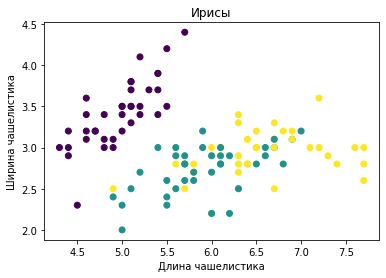

In [35]:
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)

plt.title('Ирисы')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')

plt.show()

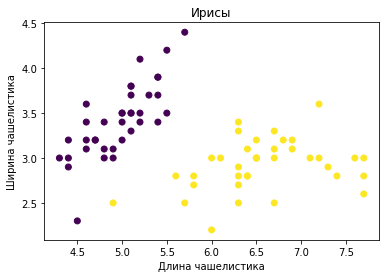

In [36]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

plt.title('Ирисы')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')

plt.scatter(x=small_train['sepal length (cm)'], y=small_train['sepal width (cm)'], c=sy_train)
plt.show()

<hr style='
	padding: 0;
	height: 1px;
    background: #5E5E5E;
	border: none;
	border-top: 1px solid #333;
	border-bottom: 1px solid #333;'>

<p style='text-align: center; font-size: 18px'>кластеризация</p>

In [39]:
from sklearn.cluster import KMeans
#  масштаб
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>Отбрасываем целевую переменную  </p>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris_frame['sepal length (cm)'], iris_frame['sepal width (cm)'], test_size=0.25)

<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>оптимальное число кластеров для алгоритма kmeans </p>

In [40]:
# число кластеров
kmeans = KMeans(n_clusters=2)

In [42]:
# данные обучаются
clusters = kmeans.fit_predict(X_scaled)

<p style='margin-top: 44px;color: #B2A76C; font-size: 16px'>Визуализируем</p>

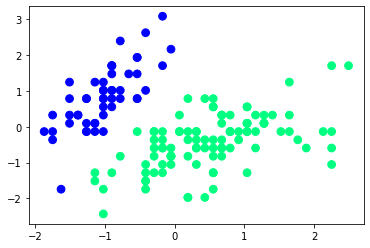

In [33]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='winter', c=clusters, s=60)